<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Library" data-toc-modified-id="Importing-Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Library</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading Data</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Pre Processing</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filtering-Sparse-Columns" data-toc-modified-id="Filtering-Sparse-Columns-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Filtering Sparse Columns</a></span></li><li><span><a href="#Filtering-Columns-with-No-Variance" data-toc-modified-id="Filtering-Columns-with-No-Variance-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Filtering Columns with No Variance</a></span></li><li><span><a href="#Filtering-Highly-Correlated-Columns" data-toc-modified-id="Filtering-Highly-Correlated-Columns-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Filtering Highly Correlated Columns</a></span></li><li><span><a href="#Missing-Value-Imputation-with-KNN-Imputer" data-toc-modified-id="Missing-Value-Imputation-with-KNN-Imputer-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Missing Value Imputation with KNN Imputer</a></span></li><li><span><a href="#Recursive-Feature-Elimination-with-CV-to-Determine-the-Number-of-Features" data-toc-modified-id="Recursive-Feature-Elimination-with-CV-to-Determine-the-Number-of-Features-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Recursive Feature Elimination with CV to Determine the Number of Features</a></span></li><li><span><a href="#Recursive-Feature-Elimination-to-Select-the-Numerical-Features" data-toc-modified-id="Recursive-Feature-Elimination-to-Select-the-Numerical-Features-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Recursive Feature Elimination to Select the Numerical Features</a></span></li></ul></li><li><span><a href="#Tokenizing-sparse-text-feature" data-toc-modified-id="Tokenizing-sparse-text-feature-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokenizing sparse text feature</a></span><ul class="toc-item"><li><span><a href="#Tokenizing-director_writer" data-toc-modified-id="Tokenizing-director_writer-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Tokenizing director_writer</a></span></li><li><span><a href="#Tokenizing-Parent-Title" data-toc-modified-id="Tokenizing-Parent-Title-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Tokenizing Parent Title</a></span></li></ul></li></ul></li><li><span><a href="#ML-Pipeline" data-toc-modified-id="ML-Pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ML Pipeline</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Baseline-Naive-Prediction" data-toc-modified-id="Model-1:-Baseline-Naive-Prediction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model 1: Baseline Naive Prediction</a></span></li><li><span><a href="#Model-2:-Linear-Model-Pipeline" data-toc-modified-id="Model-2:-Linear-Model-Pipeline-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 2: Linear Model Pipeline</a></span></li><li><span><a href="#Model-3:-XBG-Pipeline" data-toc-modified-id="Model-3:-XBG-Pipeline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model 3: XBG Pipeline</a></span></li><li><span><a href="#Model-4:-XBG-Pipeline-with-Sparse-Text-Data-Tokenization" data-toc-modified-id="Model-4:-XBG-Pipeline-with-Sparse-Text-Data-Tokenization-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model 4: XBG Pipeline with Sparse Text Data Tokenization</a></span></li></ul></li><li><span><a href="#Model-Inspection" data-toc-modified-id="Model-Inspection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Inspection</a></span><ul class="toc-item"><li><span><a href="#Variance-Explained-of-the-Tokenizers" data-toc-modified-id="Variance-Explained-of-the-Tokenizers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Variance Explained of the Tokenizers</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Permutation-Importance" data-toc-modified-id="Permutation-Importance-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Permutation Importance</a></span></li></ul></li></ul></div>

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.inspection import permutation_importance
from sklearn import feature_selection
from sklearn.feature_selection import RFECV, RFE
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

# Reading Data

In [2]:
data = pd.read_csv('C:/Users/karteuku/Desktop/IMDB_rating/imdb_rating/data/data.csv')

data.set_index('tconst',inplace= True)

cols_drop = ['primaryTitle', 'originalTitle','isAdult','directors','writers']
data = data.drop(columns = cols_drop)

# Data Pre Processing

In [3]:
X = data.drop(columns=['averageRating'])
y = data['averageRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

## Feature Selection

### Filtering Sparse Columns

In [4]:
def filter_sparse_feature(data, sparsity_threshold):
    '''
    This function filter columns with missing value fraction larger than the sparsity_threshold
    '''
    number_nan = pd.DataFrame(data.isna().sum(axis= 0)/len(data))
    number_nan.columns = ['number_nan']
    sparse_columns = number_nan[number_nan['number_nan']>=sparsity_threshold].index
    print("Sparse columns : " + str(sparse_columns))
    
    non_sparse_columns = number_nan[number_nan['number_nan']<sparsity_threshold].index
    
    data = data[non_sparse_columns]
    
    return data

In [5]:
X_train = filter_sparse_feature(X_train, 0.95)

Sparse columns : Index(['endYear', 'max_episodeNumber', 'max_seasonNumber'], dtype='object')


### Filtering Columns with No Variance

In [6]:
def filter_no_variance_feature(data):
    '''
    This function filter columns with zero variance
    '''
    no_variance_feature_list = []
    
    for col in data.columns:
        if data[col].dtypes !='object':
            if data[col].var()==0: 
                no_variance_feature_list.append(col)
    
    print("Columns with no variance : " + str(no_variance_feature_list))
            
    data = data.drop(columns = no_variance_feature_list)
    
    return data

In [7]:
X_train = filter_no_variance_feature(X_train)

Columns with no variance : []


### Filtering Highly Correlated Columns

In [8]:
## Creating list to store numerical column and non-numerical column 
object_col_list = []
num_col_list = []

for col in X_train.columns:
    if X_train[col].dtypes =='object':
        object_col_list.append(col)
    else :
        num_col_list.append(col)

In [9]:
def remove_highly_correlated_feature(data, correlation_threshold):
    '''
    This function remove columns with correlation higher than correlation_threshold
    '''
    # Create correlation matrix
    corr_matrix = data[num_col_list].corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    print("Highly correlated features : " + str(to_drop))

    # Drop features 
    data.drop(to_drop, axis=1, inplace=True)
    
    return data

In [10]:
X_train = remove_highly_correlated_feature(X_train, 0.9)

Highly correlated features : ['unique_region', 'unique_title']


In [11]:
## Updating object_col_list and num_col_list
object_col_list = []
num_col_list = []

for col in X_train.columns:
    if X_train[col].dtypes =='object':
        object_col_list.append(col)
    else :
        num_col_list.append(col)

### Missing Value Imputation with KNN Imputer 

In [12]:
## Creating feature_list, which contains all the numerical columns and 2 columnns containing sparse text features :
## directors_writers and parentTconst
feature_list = num_col_list.copy()
feature_list.append('directors_writers')
feature_list.append('parentTconst')

In [13]:
## Using KNN imputation 
knn_imputer = KNNImputer(n_neighbors=2)

t0 = time.time()
print("Fitting started...")
X_train_imputed = knn_imputer.fit_transform(X_train[num_col_list])
print(f"Fitting took {time.time() - t0:0.3f}s.")

Fitting started...
Fitting took 1116.806s.


In [14]:
## Turning the X_train_imputed into a DataFrame object
X_train_imputed = pd.DataFrame(X_train_imputed, 
                               columns = num_col_list,
                               index = list(X_train.index)
                               )

In [15]:
## Imputing the X_test data using the fitted knn-imputer
X_test_imputed = knn_imputer.transform(X_test[num_col_list])

X_test_imputed = pd.DataFrame(X_test_imputed, 
                              columns = num_col_list,
                              index = list(X_test.index)
                             )

### Recursive Feature Elimination with CV to Determine the Number of Features

In [16]:
## Specifying the rfe_base_pipeline to optimize the base_model used for RFECV procedure

rfe_base_model = xgb.XGBRegressor()

rfe_base_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),  
    ('model', rfe_base_model)
])

rfe_base_param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'model__min_child_weight': [1, 5, 10],
    'model__gamma': [0.5, 1, 1.5, 2, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

In [17]:
## Performing randomized search to optimize the rfe_base model
rfe_base_search = RandomizedSearchCV(rfe_base_pipeline, param_distributions=rfe_base_param_grid, verbose=1, 
                                      n_iter=3, n_jobs = -1, cv = 3)
t0 = time.time()
print("Fitting started...")
rfe_base_search.fit(X_train_imputed, y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

Fitting started...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting took 731.704s.


In [18]:
## Get best parameters and score
best_params = rfe_base_search.best_params_
        
## Update rfe_base parameters
tuned_params = {item[7:]: best_params[item] for item in best_params}
rfe_base_model.set_params(**tuned_params)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6, gamma=0.5,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=7,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=1.0, tree_method=None,
             validate_parameters=None, verbosity=None)

In [19]:
## Creating a Pipeline object to perform RFECV procedure 
class PipelineRFE(Pipeline):
    '''
    This is a Pipeline object to perform RFE procedure on sklearn Pipeline.
    Source: https://towardsdatascience.com/model-design-and-selection-with-scikit-learn-18a29041d02a
    '''
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [24]:
## Defining the Pipeline for RFECV procedure
rfecv_pipeline = PipelineRFE([
    ('standard_scaler', StandardScaler()),
    ('model', rfe_base_model)
])

## Initialize RFECV object
rfecv_min_features_to_select = 10
rfecv_step = 5
feature_selector_rfecv = RFECV(rfecv_pipeline, cv = 3, verbose = 0, 
                               min_features_to_select = rfecv_min_features_to_select, 
                               step = rfecv_step)

## Fit RFECV
t0 = time.time()
print("Fitting started...")
feature_selector_rfecv.fit(X_train_imputed, y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

## Get selected features
feature_names_rfecv = X_train_imputed.columns
selected_features_rfecv = feature_names_rfecv[feature_selector_rfecv.support_].tolist()

Fitting started...
Fitting took 72.250s.


In [25]:
print("Number of RFECV selected features is " + str(len(selected_features_rfecv)))

Number of RFECV selected features is 60


In [27]:
## Storing the RFECV performance into a DataFrame
performance_curve = {"Number of Features": list(range(rfecv_min_features_to_select, 
                                                      len(feature_names_rfecv) + 1,
                                                      rfecv_step
                                                     )
                                               ),
                    "Score": feature_selector_rfecv.grid_scores_}
performance_curve = pd.DataFrame(performance_curve)

Text(0.5, 1.0, 'RFECV Performance Curve')

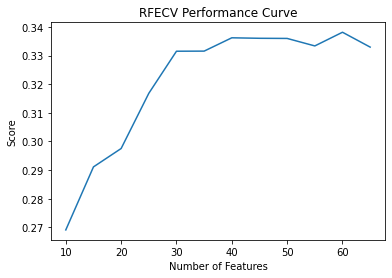

In [28]:
## Plotting the performance to gauge the number of feature to be selected 
sns.lineplot(x = "Number of Features", y = "Score", data = performance_curve)
plt.title("RFECV Performance Curve")

### Recursive Feature Elimination to Select the Numerical Features

In [30]:
## Defining the Pipeline object to perform RFE
rfe_pipeline = PipelineRFE([
    ('standard_scaler', StandardScaler()),
    ('model', rfe_base_model)
])

## Initialize RFE object
n_features_to_select = 33 ## Based on the result of RFECV
feature_selector_rfe = RFE(rfe_pipeline, n_features_to_select = n_features_to_select, step = 4, verbose = 0)

## Fit RFE
print("Fitting started...")
feature_selector_rfe.fit(X_train_imputed, y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

## Get selected features labels
feature_names_rfe = X_train_imputed.columns
selected_features_rfe = feature_names_rfe[feature_selector_rfe.support_].tolist()

Fitting started...
Fitting took 161.344s.


In [31]:
## Storing the selected numerical features and the 2 sparse text features on selected_features list
selected_features = selected_features_rfe.copy()
selected_features.append('directors_writers')
selected_features.append('parentTconst')

## Tokenizing sparse text feature

### Tokenizing director_writer

In [32]:
class DirectorWriterSparseTokenizer(BaseEstimator, TransformerMixin):
    '''
    This is a custom Transformer object to perform 2 transformation on a sparse text columns : 
    1. CountVectorizer and 2. TruncatedSVD.
    
    It differs from the off-the-shelves sklearn object by enabling treatment of missing value.
    
    This Transformer is specific for 'directors_writers' column
    '''
    def __init__(self):
        '''
        This function initializes the DirectorWriterSparseTokenizer Transformer object 
        '''
        super().__init__()
        ## Storing the index of the non missing value data on the original DataFrame
        self.index_ = None
        
        ## Storing the column which contains the sparse text data to be transformed
        self.column_ = 'directors_writers'
        
        ## The CountVectorizer object to vectorize the text data
        self.tokenizer_ = None
        
        ## The sparse matrix object storing the tokenized data
        self.tokenized_matrix_ = None
        
        ## The TruncatedSVD object to reduce the dimensionality
        self.tsvd_ = None
        
    def fit(self, X, y=None):
        '''
        This functions fit the DirectorWriterSparseTokenizer Transformer object with the training data
        and return a fitted Tranformer object
        '''
        self.index_ = X[self.column_].dropna().index
        
        ## First transformation : fitting the CountVectorizer
        self.tokenizer_ = CountVectorizer(tokenizer=lambda x: x.split(', '), binary=True
                                         )
        self.tokenizer_ = self.tokenizer_.fit(X[self.column_].dropna())
        
        ## Storing the full tokenized data into a scipy sparse matrix object
        self.tokenized_matrix_ = csr_matrix(self.tokenizer_.transform(X[self.column_].dropna()))
        
        ## Second transformation : fitting the TruncatedSVD
        self.tsvd_ = TruncatedSVD(n_components=75, n_iter=5, random_state=42)
        self.tsvd_ = self.tsvd_.fit(self.tokenized_matrix_)
        
        ## Return the fitted Transformer object from the 2 Transformer
        return self

    def transform(self, X, y=None):
        '''
        This function does the following: 
        1. It takes the self.column_ from X DataFrame and drop missing values.
        2. It performs the DirectorWriterSparseTokenizer transformation on the array from step 1.
        3. It joins the result of the DirectorWriterSparseTokenizer transformation into the original X DataFrame 
           and drop the self.column_ so that the DataFrame can be used for the next step in the Pipeline
        
        '''
        ## Storing the index of the data so that it can be used to rejoined the transformed data
        X_index_ = X[self.column_].dropna().index
        
        ## Performing the transformation on the data
        X_tsvd_tokenized_matrix_ = self.tsvd_.transform(csr_matrix(self.tokenizer_.transform(X[self.column_].dropna())))
        
        ## Converting the X_tsvd_tokenized_matrix_ object in a DataFrame with the appropriate index
        X_tsvd_tokenized_matrix_df = pd.DataFrame(X_tsvd_tokenized_matrix_, 
                                                  index = X_index_, 
                                                  columns = [self.column_ + 'tsvd_' + str(col) 
                                                             for col in range(X_tsvd_tokenized_matrix_.shape[1])]
                                                 )
        
        ## Joining the X_tsvd_tokenized_matrix_df into the initial DataFrame 
        X_output = X.join(X_tsvd_tokenized_matrix_df)
        
        ## Dropping the self.column_ from X_output 
        X_output = X_output.drop(columns = [self.column_])

        return X_output

### Tokenizing Parent Title

In [33]:
class ParentTitleSparseTokenizer(BaseEstimator, TransformerMixin):
    '''
    This is a custom Transformer object to perform 2 transformation on a sparse text columns : 
    1. CountVectorizer and 2. TruncatedSVD.
    
    It differs from the off-the-shelves sklearn object by enabling treatment of missing value.
    
    This Transformer is specific for 'parentTconst' column
    '''
    def __init__(self):
        '''
        This function initializes the ParentTitleSparseTokenizer Transformer object 
        '''
        super().__init__()
        ## Storing the index of the non missing value data on the original DataFrame
        self.index_ = None
        
        ## Storing the column which contains the sparse text data to be transformed
        self.column_ = 'parentTconst'
        
        ## The CountVectorizer object to vectorize the text data
        self.tokenizer_ = None
        
        ## The sparse matrix object storing the tokenized data
        self.tokenized_matrix_ = None
        self.tsvd_ = None

    def fit(self, X, y=None):
        '''
        This functions fit the ParentTitleSparseTokenizer Transformer object with the training data
        and return a fitted Tranformer object
        '''
        self.index_ = X[self.column_].dropna().index
        
        ## First transformation : fitting the CountVectorizer
        self.tokenizer_ = CountVectorizer(tokenizer=lambda x: x.split(', '), binary=True
                                         )
        self.tokenizer_ = self.tokenizer_.fit(X[self.column_].dropna())
        
        ## Storing the full tokenized data into a scipy sparse matrix object
        self.tokenized_matrix_ = csr_matrix(self.tokenizer_.transform(X[self.column_].dropna()))
        
        ## Second transformation : fitting the TruncatedSVD
        self.tsvd_ = TruncatedSVD(n_components=125, n_iter=5, random_state=42)
        self.tsvd_ = self.tsvd_.fit(self.tokenized_matrix_)
        
        ## Return the fitted Transformer object from the 2 Transformer
        return self

    def transform(self, X, y=None):
        '''
        This function does the following: 
        1. It takes the self.column_ from X DataFrame and drop missing values.
        2. It performs the DirectorWriterSparseTokenizer transformation on the array from step 1.
        3. It joins the result of the ParentTitleSparseTokenizer transformation into the original X DataFrame 
           and drop the self.column_ so that the DataFrame can be used for the next step in the Pipeline
        
        '''
        ## Storing the index of the data so that it can be used to rejoined the transformed data
        X_index_ = X[self.column_].dropna().index
        
        ## Performing the transformation on the data
        X_tsvd_tokenized_matrix_ = self.tsvd_.transform(csr_matrix(self.tokenizer_.transform(X[self.column_].dropna())))
        
        ## Converting the X_tsvd_tokenized_matrix_ object in a DataFrame with the appropriate index
        X_tsvd_tokenized_matrix_df = pd.DataFrame(X_tsvd_tokenized_matrix_, 
                                                  index = X_index_, 
                                                  columns = [self.column_ + 'tsvd_' + str(col) 
                                                             for col in range(X_tsvd_tokenized_matrix_.shape[1])]
                                                 )
        
        ## Joining the X_tsvd_tokenized_matrix_df into the initial DataFrame 
        X_output = X.join(X_tsvd_tokenized_matrix_df)
        
        ## Dropping the self.column_ from X_output
        X_output = X_output.drop(columns = [self.column_])

        return X_output

# ML Pipeline

## Model 1: Baseline Naive Prediction

In [34]:
naive_mae = mean_absolute_error(y_test, [y_train.mean()]*len(y_test))

print(f"The Naive Model Mean Absolute Error is {naive_mae:0.3f}")

The Naive Model Mean Absolute Error is 1.074


In [35]:
naive_mse = mean_squared_error(y_test, [y_train.mean()]*len(y_test))

print(f"The Naive Model Mean Squared Error is {naive_mse:0.3f}")

The Naive Model Mean Squared Error is 1.933


In [36]:
naive_r2_score = r2_score(y_test, [y_train.mean()]*len(y_test))

print(f"The Naive Model R2 Score is {naive_r2_score:0.3f}")

The Naive Model R2 Score is -0.000


## Model 2: Linear Model Pipeline

In [37]:
## Defining the elastic net pipeline and parameters
el_net_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('model', ElasticNet())
])

el_net_param_grid = {
    'model__alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    'model__l1_ratio' : np.arange(0, 1, 0.01)
}

In [38]:
## Tuning the Linear Model with RandomizedSearchCV
t0 = time.time()
el_net_search = RandomizedSearchCV(el_net_pipeline, param_distributions=el_net_param_grid, verbose=1,
                                   n_iter=4, n_jobs = -1, cv = 3,scoring='r2'
                                  )
print("Fitting started...")
el_net_search.fit(X_train_imputed[selected_features_rfe], y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

Fitting started...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting took 6.946s.


In [39]:
print(f"The Linear Model CV Best R2 Score is {el_net_search.best_score_:0.3f}")

The Linear Model CV Best R2 Score is 0.223


In [40]:
el_net_mae = mean_absolute_error(y_test, 
                                 el_net_search.predict(X_test_imputed[selected_features_rfe])
                                )

print(f"The Linear Model Mean Absolute Error is {el_net_mae:0.3f}")

The Linear Model Mean Absolute Error is 0.917


In [41]:
el_net_mse = mean_squared_error(y_test, 
                                 el_net_search.predict(X_test_imputed[selected_features_rfe])
                                )

print(f"The Linear Model Mean Absolute Error is {el_net_mse:0.3f}")

The Linear Model Mean Absolute Error is 1.512


In [42]:
el_net_r2_score = r2_score(y_test, 
                           el_net_search.predict(X_test_imputed[selected_features_rfe])
                          )

print(f"The Linear Model R2 Score is {el_net_r2_score :0.3f}")

The Linear Model R2 Score is 0.218


## Model 3: XBG Pipeline

In [43]:
## Defining the pipeline and the parameter tuning for XGB pipepline
xgb_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),  
    ('model', xgb.XGBRegressor())
])

xgb_param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'model__min_child_weight': [1, 5, 10],
    'model__gamma': [0.5, 1, 1.5, 2, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

In [44]:
## Tuning the XGB Model with RandomizedSearchCV
t0 = time.time()
print("Fitting started...")
xgb_search = RandomizedSearchCV(xgb_pipeline, param_distributions=xgb_param_grid, verbose=1, 
                                n_iter=4, n_jobs = -1, cv = 3,scoring='r2')
xgb_search.fit(X_train[selected_features_rfe], 
               y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

Fitting started...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting took 628.812s.


In [45]:
print(f"The XGB Model CV Best R2 Score is {xgb_search.best_score_:0.3f}")

The XGB Model CV Best R2 Score is 0.347


In [46]:
xgb_mae = mean_absolute_error(y_test, 
                              xgb_search.predict(X_test[selected_features_rfe])
                             )

print(f"The XGB Model Mean Absolute Error is {xgb_mae:0.3f}")

The XGB Model Mean Absolute Error is 0.821


In [47]:
xgb_mse = mean_squared_error(y_test, 
                             xgb_search.predict(X_test[selected_features_rfe])
                            )

print(f"The XGB Model Mean Squared Error is {xgb_mse:0.3f}")

The XGB Model Mean Squared Error is 1.271


In [48]:
xgb_r2_score = r2_score(y_test, 
                        xgb_search.predict(X_test[selected_features_rfe])
                        )

print(f"The XGB Model R2 Score is {xgb_r2_score:0.3f}")

The XGB Model R2 Score is 0.342


## Model 4: XBG Pipeline with Sparse Text Data Tokenization

In [49]:
## Defining the pipeline and parameter tuning for XGB with Sparse Tokenizer Model
xgb_tokenizer_pipeline = Pipeline([
    ('parent_title_tokenizer', ParentTitleSparseTokenizer()),
    ('director_writer_tokenizer', DirectorWriterSparseTokenizer()),
    ('standard_scaler', StandardScaler()),  
    ('model', xgb.XGBRegressor())
])

xgb_tokenizer_param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'model__min_child_weight': [1, 5, 10],
    'model__gamma': [0.5, 1, 1.5, 2, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

In [50]:
## Tuning the XGB with Sparse Tokenizer Model with RandomizedSearchCV
t0 = time.time()
print("Fitting started...")
xgb_tokenizer_search = RandomizedSearchCV(xgb_tokenizer_pipeline, 
                                          param_distributions=xgb_tokenizer_param_grid, verbose=1, 
                                          n_iter=4, n_jobs = -1, cv = 3,scoring='r2')
xgb_tokenizer_search.fit(X_train[selected_features], y_train)
print(f"Fitting took {time.time() - t0:0.3f}s.")

Fitting started...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Fitting took 1572.745s.


In [51]:
print(f"The XGB with Sparse Tokenizer Model CV Best R2 Score is {xgb_tokenizer_search.best_score_:0.3f}")

The XGB with Sparse Tokenizer Model CV Best R2 Score is 0.365


In [52]:
xgb_tokenizer_mae = mean_absolute_error(y_test, 
                                       xgb_tokenizer_search.predict(X_test[selected_features])
                                      )

print(f"The XGB with Sparse Tokenizer Model Mean Absolute Error is {xgb_tokenizer_mae:0.3f}")

The XGB with Sparse Tokenizer Model Mean Absolute Error is 0.792


In [53]:
xgb_tokenizer_mse = mean_squared_error(y_test, 
                                       xgb_tokenizer_search.predict(X_test[selected_features])
                                      )

print(f"The XGB with Sparse Tokenizer Model Mean Squared Error is {xgb_tokenizer_mse:0.3f}")

The XGB with Sparse Tokenizer Model Mean Squared Error is 1.215


In [54]:
xgb_tokenizer_r2_score = r2_score(y_test, 
                                  xgb_tokenizer_search.predict(X_test[selected_features])
                                  )

print(f"The XGB with Sparse Tokenizer Model R2 Score is {xgb_tokenizer_r2_score:0.3f}")

The XGB with Sparse Tokenizer Model R2 Score is 0.371


# Model Inspection

## Variance Explained of the Tokenizers

In [55]:
parent_title_num_token = xgb_tokenizer_search.best_estimator_.steps[0][1].tokenized_matrix_.shape[0]

print(f"The ParentTitleSparseTokenizer initial dimension is {parent_title_num_token}")

The ParentTitleSparseTokenizer initial dimension is 32048


In [56]:
parent_title_explained_variance = xgb_tokenizer_search.best_estimator_.steps[0][1].tsvd_.explained_variance_ratio_.sum()

print(f"The ParentTitleSparseTokenizer Explained Variance is {parent_title_explained_variance*100:0.1f} %")

The ParentTitleSparseTokenizer Explained Variance is 13.8 %


In [57]:
director_writer_num_token = xgb_tokenizer_search.best_estimator_.steps[1][1].tokenized_matrix_.shape[0]

print(f"The DirectorWriterSparseTokenizer initial dimension is {director_writer_num_token}")

The DirectorWriterSparseTokenizer initial dimension is 48686


In [58]:
director_writer_explained_variance = xgb_tokenizer_search.best_estimator_.steps[1][1].tsvd_.explained_variance_ratio_.sum()

print(f"The DirectorWriterSparseTokenizer Explained Variance is {director_writer_explained_variance*100:0.1f} %")

The DirectorWriterSparseTokenizer Explained Variance is 2.0 %


## Feature Importance

In [59]:
def get_feature_importance():
    '''
    This function extract the feature importance from the xgb_tokenizer_search object and return it 
    in a DataFrame
    '''
    feature_importance_col_list = selected_features_rfe.copy()

    for col in range(125):
        feature_importance_col_list.append('parentTconst_tsvd_' + str(col))
    
    for col in range(75):
        feature_importance_col_list.append('director_writer_tsvd_' + str(col))
        
    feature_importance_df = pd.DataFrame(xgb_tokenizer_search.best_estimator_.steps[3][1].feature_importances_,
                                         index = feature_importance_col_list, 
                                         columns = ['feature_importance']
                                        )
    return feature_importance_df

In [60]:
feature_importance_df = get_feature_importance()

In [61]:
print("The Top 10 Features with the Highest Feature Importance Score")
feature_importance_df.sort_values(by='feature_importance', ascending=False).head(10)

The Top 10 Features with the Highest Feature Importance Score


,feature_importance
parentTconst_tsvd_26,0.185252
parentTconst_tsvd_84,0.061959
type_movie,0.054445
genre_Documentary,0.044295
genre_Horror,0.024853
parentTconst_tsvd_34,0.017664
average_show_past_rating,0.017089
genre_Drama,0.014170
parentTconst_tsvd_12,0.009365
genre_Reality-TV,0.008998


In [62]:
print("The Bottom 10 Features with the Lowest Feature Importance Score")
feature_importance_df.sort_values(by='feature_importance', ascending=True).head(10)

The Bottom 10 Features with the Lowest Feature Importance Score


,feature_importance
type_tvEpisode,0.001136
parentTconst_tsvd_5,0.001317
parentTconst_tsvd_9,0.001399
parentTconst_tsvd_45,0.001450
parentTconst_tsvd_13,0.001482
parentTconst_tsvd_2,0.001505
director_writer_tsvd_22,0.001602
director_writer_tsvd_62,0.001606
parentTconst_tsvd_38,0.001617
director_writer_tsvd_13,0.001621


## Permutation Importance

In [63]:
def get_permutation_importance():
    '''
    This function calculates the permutation importance of the xgb_tokenizer_search object and return it 
    in a DataFrame
    '''
    t0 = time.time()
    print("Fitting started...")
    permutation_test = permutation_importance(xgb_tokenizer_search, X_test[selected_features], y_test, 
                                              n_repeats=5,random_state=0)
    print(f"Fitting took {time.time() - t0:0.3f}s.")
    
    permutation_test_df = pd.DataFrame(permutation_test['importances_mean'],
                                       index = X_train[selected_features].columns,
                                       columns = ['permutation_importance_score']
                                       )
    
    return permutation_test_df

In [64]:
permutation_test_df = get_permutation_importance()

Fitting started...
Fitting took 119.957s.


In [65]:
print("The Top 10 Features with the Highest Permutation Importance Score")
permutation_test_df.sort_values(by = 'permutation_importance_score', ascending=False).head(10)

The Top 10 Features with the Highest Permutation Importance Score


,permutation_importance_score
parentTconst,0.362854
average_show_past_rating,0.144627
numVotes,0.055699
startYear,0.048718
type_movie,0.045015
genre_Documentary,0.039149
directors_writers,0.038809
runtimeMinutes,0.036136
director_median_past_rating,0.022302
number_past_episode,0.021833


In [66]:
print("The Bottom 10 Features with the Lowest Permutation Importance Score")
permutation_test_df.sort_values(by = 'permutation_importance_score', ascending=True).head(10)

The Bottom 10 Features with the Lowest Permutation Importance Score


,permutation_importance_score
type_short,-0.000126
type_tvEpisode,-0.000006
genre_Game-Show,0.000247
type_tvSpecial,0.000468
genre_no_genre,0.000475
type_tvMiniSeries,0.000646
genre_History,0.000667
genre_Sport,0.000737
genre_Adventure,0.001510
type_videoGame,0.001980
